# Práctica 2: Procesamiento de datatasets

El dataset en cuestión contiene información detallada sobre múltiples exoplanetas, con características como la longitud de onda central de las observaciones, la profundidad del tránsito, la relación entre el radio del planeta y su estrella, y datos adicionales sobre los instrumentos y las instalaciones utilizadas en las observaciones. Estos datos son fundamentales para el estudio de las propiedades físicas y atmosféricas de los exoplanetas.

## Analisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Descripción de las variables transito**

**Datos de Planetas**

- pl_name: Nombre del planeta
- sy_snum: Número de estrellas
- sy_pnum: Número de planetas
- sy_mnum: Número de lunas
- pl_controv_flag: Indicador de controversia
- pl_orbper: Período orbital [días]
- pl_orbsmax: Semieje mayor de la órbita [au]
- pl_rade: Radio del planeta [Radios de la Tierra]
- pl_masse: Masa del planeta [Masas de la Tierra]
- pl_orbeccen: Excentricidad
- pl_insol: Flujo de insolación [Flujo de la Tierra]- pl_eqt: Temperatura de equilibrio [K]
- pl_orbincl: Inclinación [grados]
- pl_tranmid: Punto medio del tránsito [días]
- ttv_flag: Los datos muestran variaciones en el tiempo de tránsito
- pl_ratror: Relación entre el radio del planeta y el radio estelar
- st_spectype: Tipo espectral
- st_teff: Temperatura efectiva estelar [K]
- st_rad: Radio estelar [Radios solares]
- st_mass: Masa estelar [Masas solares]
- st_metratio: Relación de metalicidad estelar
- st_logg: Gravedad superficial estelar [log10(cm/s2)]
- st_age: Edad estelar [Gyr]
- st_dens: Densidad estelar [g/cm3]
- sy_refname: Referencia del parámetro del sistema
- sy_dist: Distancia [pc]
- rowupdate: Fecha de la última actualización

In [2]:
transdata = pd.read_csv('001transitspec_2022.07.13_08.17.50.csv')
planetdata = pd.read_csv('002PS_2022.07.13_08.13.48.csv')
spectdata = pd.read_csv('003emissionspec_2022.07.13_08.07.04.csv')

In [3]:
expdf = pd.DataFrame(planetdata)
expdf.head()

,pl_name,sy_snum,sy_pnum,sy_mnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,...,st_teff,st_rad,st_mass,st_metratio,st_logg,st_age,st_dens,sy_refname,sy_dist,rowupdate
0,11 Com b,2,1,0,0,326.03000,1.29,NaN,NaN,0.231,...,4742.0,19.00,2.70,[Fe/H],2.31,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,93.1846,14/05/2014
1,11 Com b,2,1,0,0,NaN,1.21,NaN,NaN,NaN,...,NaN,NaN,2.60,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,93.1846,23/07/2014
2,11 UMi b,1,1,0,0,NaN,1.51,NaN,NaN,NaN,...,NaN,NaN,1.70,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,125.3210,25/04/2018
3,11 UMi b,1,1,0,0,516.21997,1.53,NaN,NaN,0.080,...,4213.0,29.79,2.78,[Fe/H],1.93,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,125.3210,04/09/2018
4,11 UMi b,1,1,0,0,516.22000,1.54,NaN,NaN,0.080,...,4340.0,24.08,1.80,[Fe/H],1.60,1.56,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,125.3210,25/04/2018


**Validamos correlación entre las variables**

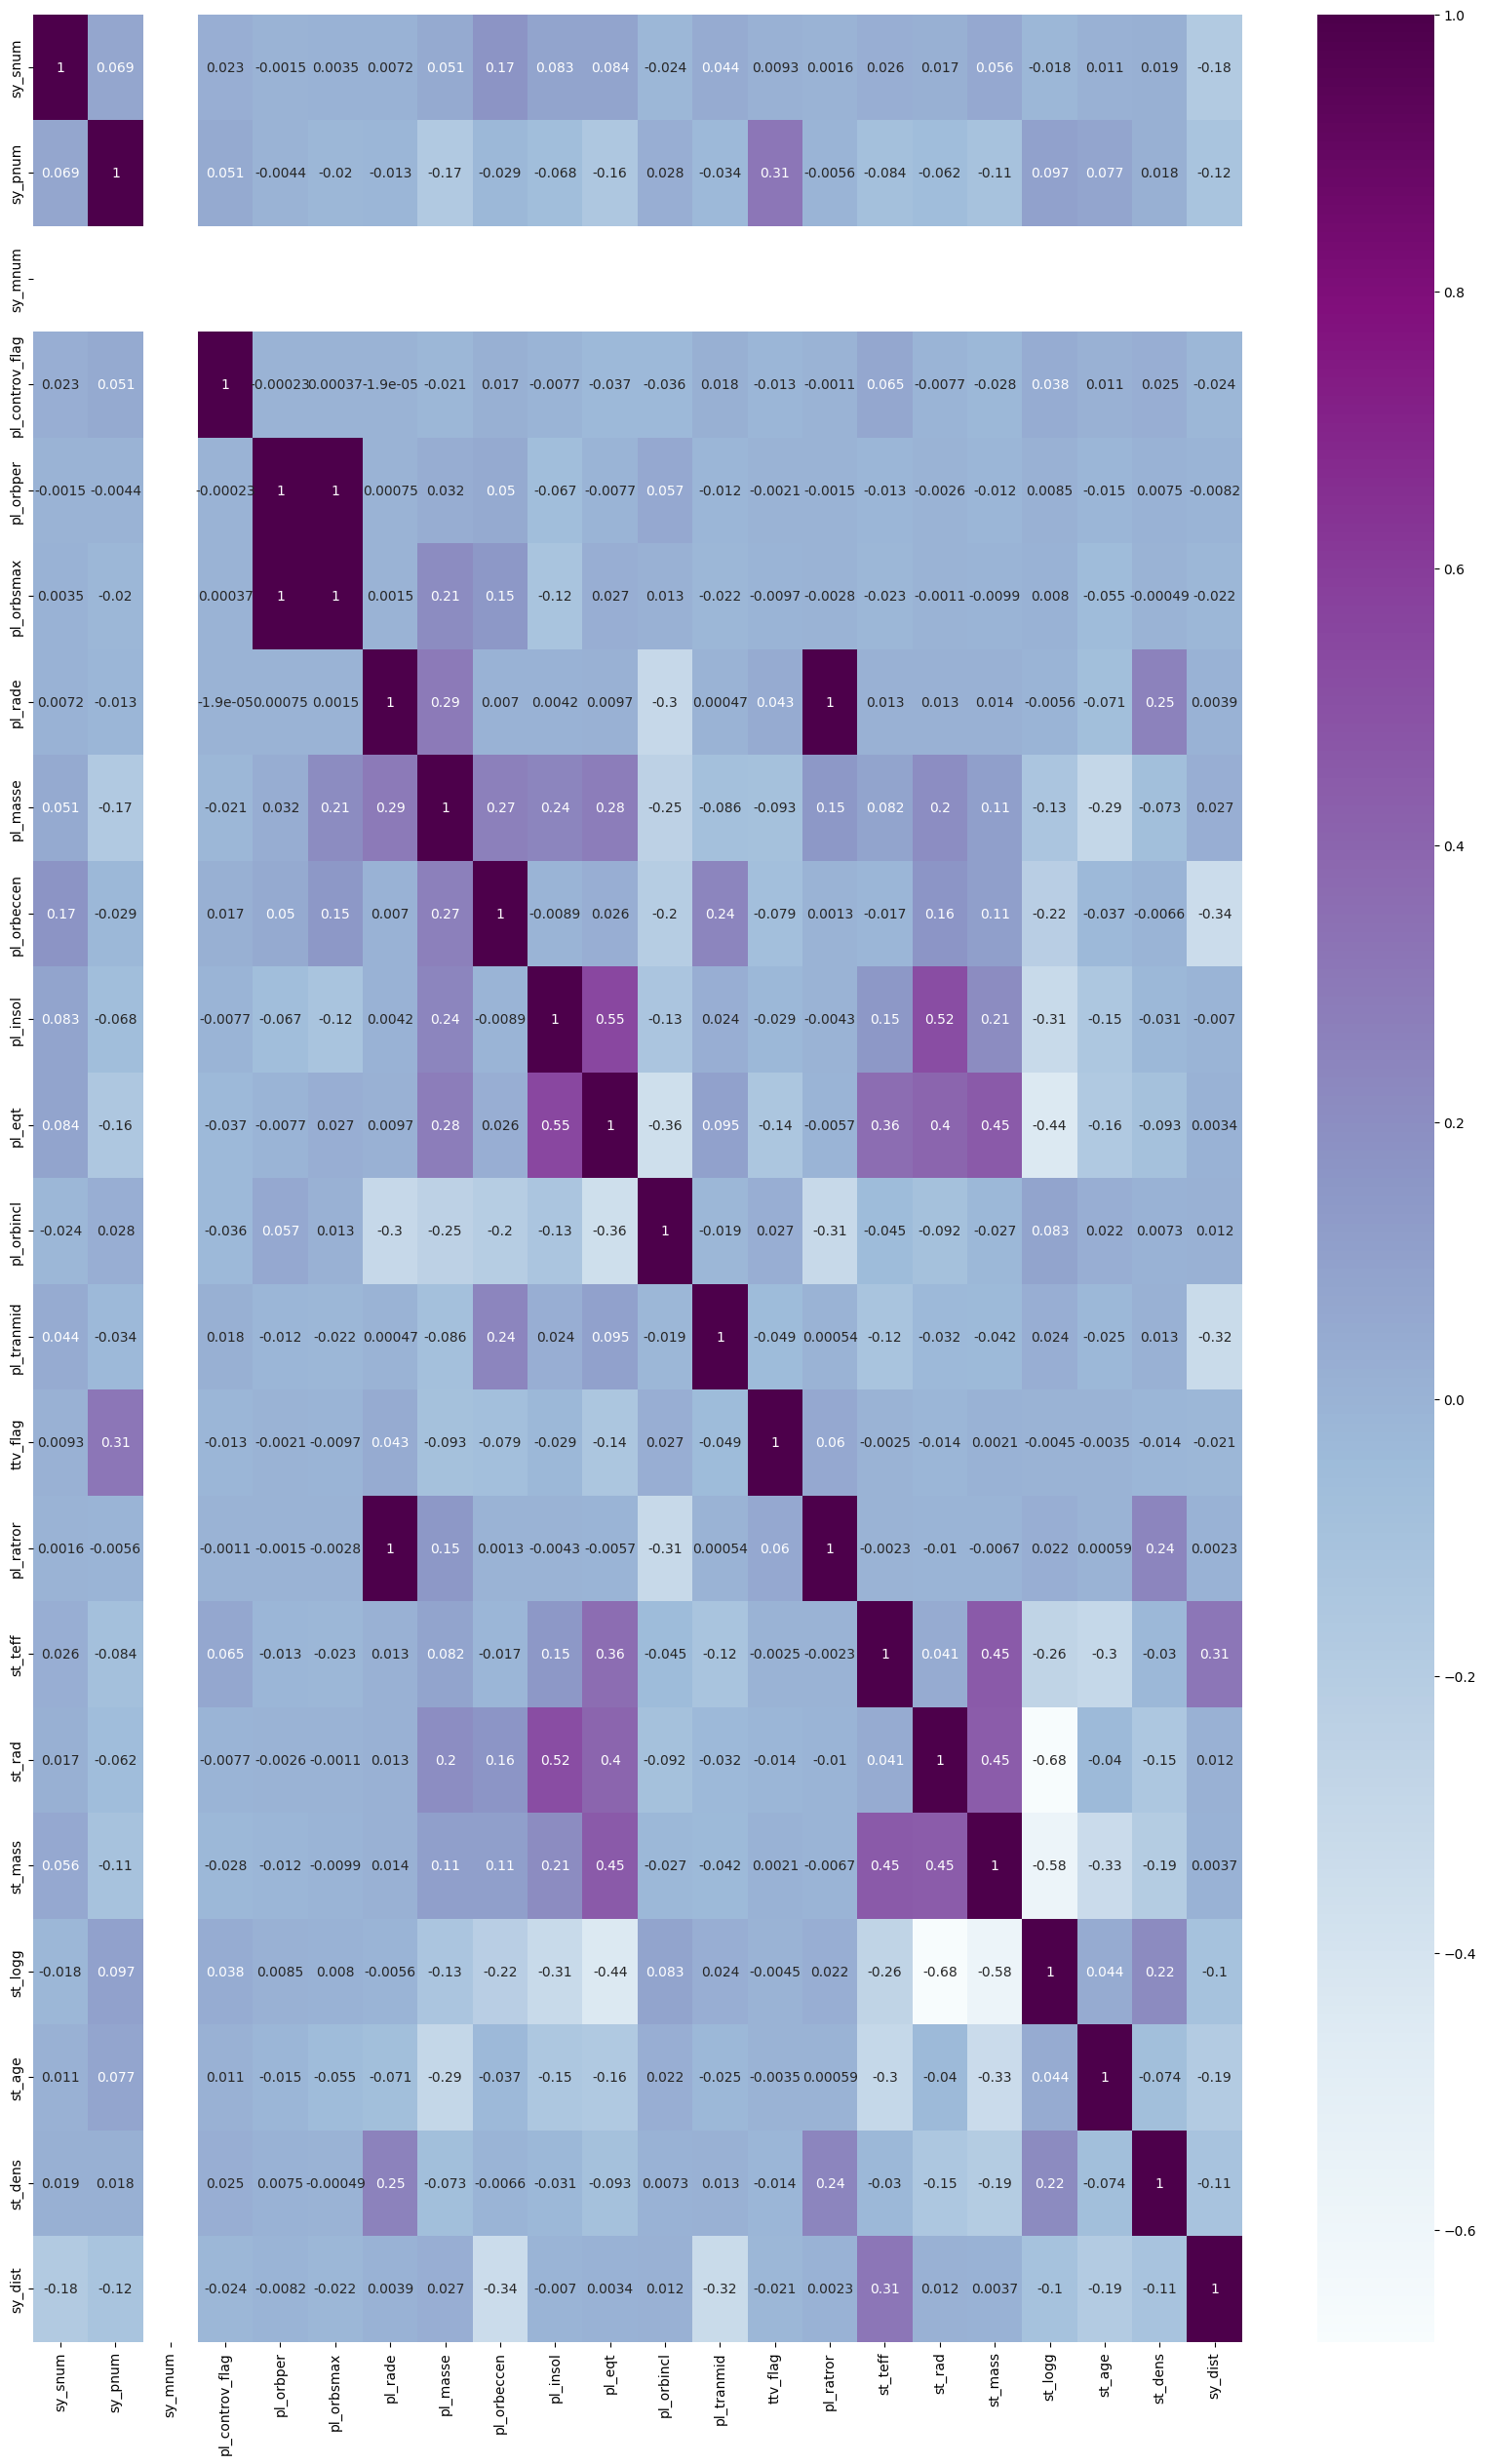

In [4]:
columnas_corr = ['sy_snum', 'sy_pnum', 'sy_mnum', 'pl_controv_flag', 'pl_orbper', 'pl_orbsmax',
                      'pl_rade', 'pl_masse', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'pl_orbincl',
                      'pl_tranmid', 'ttv_flag', 'pl_ratror','st_teff', 'st_rad',
                      'st_mass', 'st_logg', 'st_age', 'st_dens', 'sy_dist']

corr_matrix = expdf[columnas_corr].corr()


plt.figure(figsize=(20, 31))
sns.heatmap(corr_matrix,cmap="BuPu", annot=True)
plt.show()

In [5]:
print(expdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32576 entries, 0 to 32575
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          32576 non-null  object 
 1   sy_snum          32576 non-null  int64  
 2   sy_pnum          32576 non-null  int64  
 3   sy_mnum          32576 non-null  int64  
 4   pl_controv_flag  32576 non-null  int64  
 5   pl_orbper        29773 non-null  float64
 6   pl_orbsmax       18201 non-null  float64
 7   pl_rade          22719 non-null  float64
 8   pl_masse         2796 non-null   float64
 9   pl_orbeccen      16674 non-null  float64
 10  pl_insol         13716 non-null  float64
 11  pl_eqt           14739 non-null  float64
 12  pl_orbincl       15382 non-null  float64
 13  pl_tranmid       26733 non-null  float64
 14  ttv_flag         32576 non-null  int64  
 15  pl_ratror        18266 non-null  float64
 16  st_spectype      1911 non-null   object 
 17  st_teff     

**Variables de transitos**

- plntname: Nombre del planeta
- centralwavelng: Longitud de onda central [micrones]
- bandwidth: Ancho de banda [micrones]
- plntransdep: Profundidad de tránsito [porcentaje]
- plntransdeperr1: Incertidumbre superior de profundidad de tránsito [porcentaje]
- plntransdeperr2: Incertidumbre inferior de profundidad de tránsito [porcentaje]
- plntransdeplim: Indicador de límite de profundidad de tránsito
- plnradj: Radio del planeta [radios de Júpiter]
- plnradjerr1: Incertidumbre superior del radio del planeta [radios de Júpiter]
- plnradjerr2: Incertidumbre inferior del radio del planeta [radios de Júpiter]
- plnradjlim: Indicador de límite del radio del planeta
- plnratror: Proporción del radio del planeta al radio estelar
- plnratrorerr1: Incertidumbre superior de la proporción del radio del planeta al radio estelar
- plnratrorerr2: Incertidumbre inferior de la proporción del radio del planeta al radio estelar
- plnratrorlim: Indicador de límite de la proporción del radio del planeta al radio estelar
- plntranmid: Punto medio del tránsito [BJD]
- plntranmiderr1: Incertidumbre superior del punto medio del tránsito [BJD]
- plntranmiderr2: Incertidumbre inferior del punto medio del tránsito [BJD]
- plntranmidlim: Indicador de límite del punto medio del tránsito
- plntranreflink: Referencia
- facility: Instalación
- instrument: Instrumento

In [6]:
trnsdf = pd.DataFrame(transdata)
trnsdf.head()

,plntname,centralwavelng,bandwidth,plntransdep,plntransdeperr1,plntransdeperr2,plntransdeplim,plnradj,plnradjerr1,plnradjerr2,...,plnratrorerr1,plnratrorerr2,plnratrorlim,plntranmid,plntranmiderr1,plntranmiderr2,plntranmidlim,plntranreflink,facility,instrument
0,WASP-12 b,0.335,0.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00087,-0.00087,0.0,2454508.977,0.00031,-0.00031,0.0,<a refstr=SING_ET_AL__2013 href=https://ui.ads...,Hubble Space Telescope satellite,Space Telescope Imaging Spectrograph
1,WASP-12 b,0.405,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00025,-0.00025,0.0,2454508.977,0.00031,-0.00031,0.0,<a refstr=SING_ET_AL__2013 href=https://ui.ads...,Hubble Space Telescope satellite,Space Telescope Imaging Spectrograph
2,WASP-12 b,0.502,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00031,-0.00031,0.0,2454508.977,0.00031,-0.00031,0.0,<a refstr=SING_ET_AL__2013 href=https://ui.ads...,Hubble Space Telescope satellite,Space Telescope Imaging Spectrograph
3,WASP-12 b,0.547,0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00035,-0.00035,0.0,2454508.977,0.00031,-0.00031,0.0,<a refstr=SING_ET_AL__2013 href=https://ui.ads...,Hubble Space Telescope satellite,Space Telescope Imaging Spectrograph
4,WASP-12 b,0.555,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00057,-0.00057,0.0,2454508.977,0.00031,-0.00031,0.0,<a refstr=SING_ET_AL__2013 href=https://ui.ads...,Hubble Space Telescope satellite,Space Telescope Imaging Spectrograph


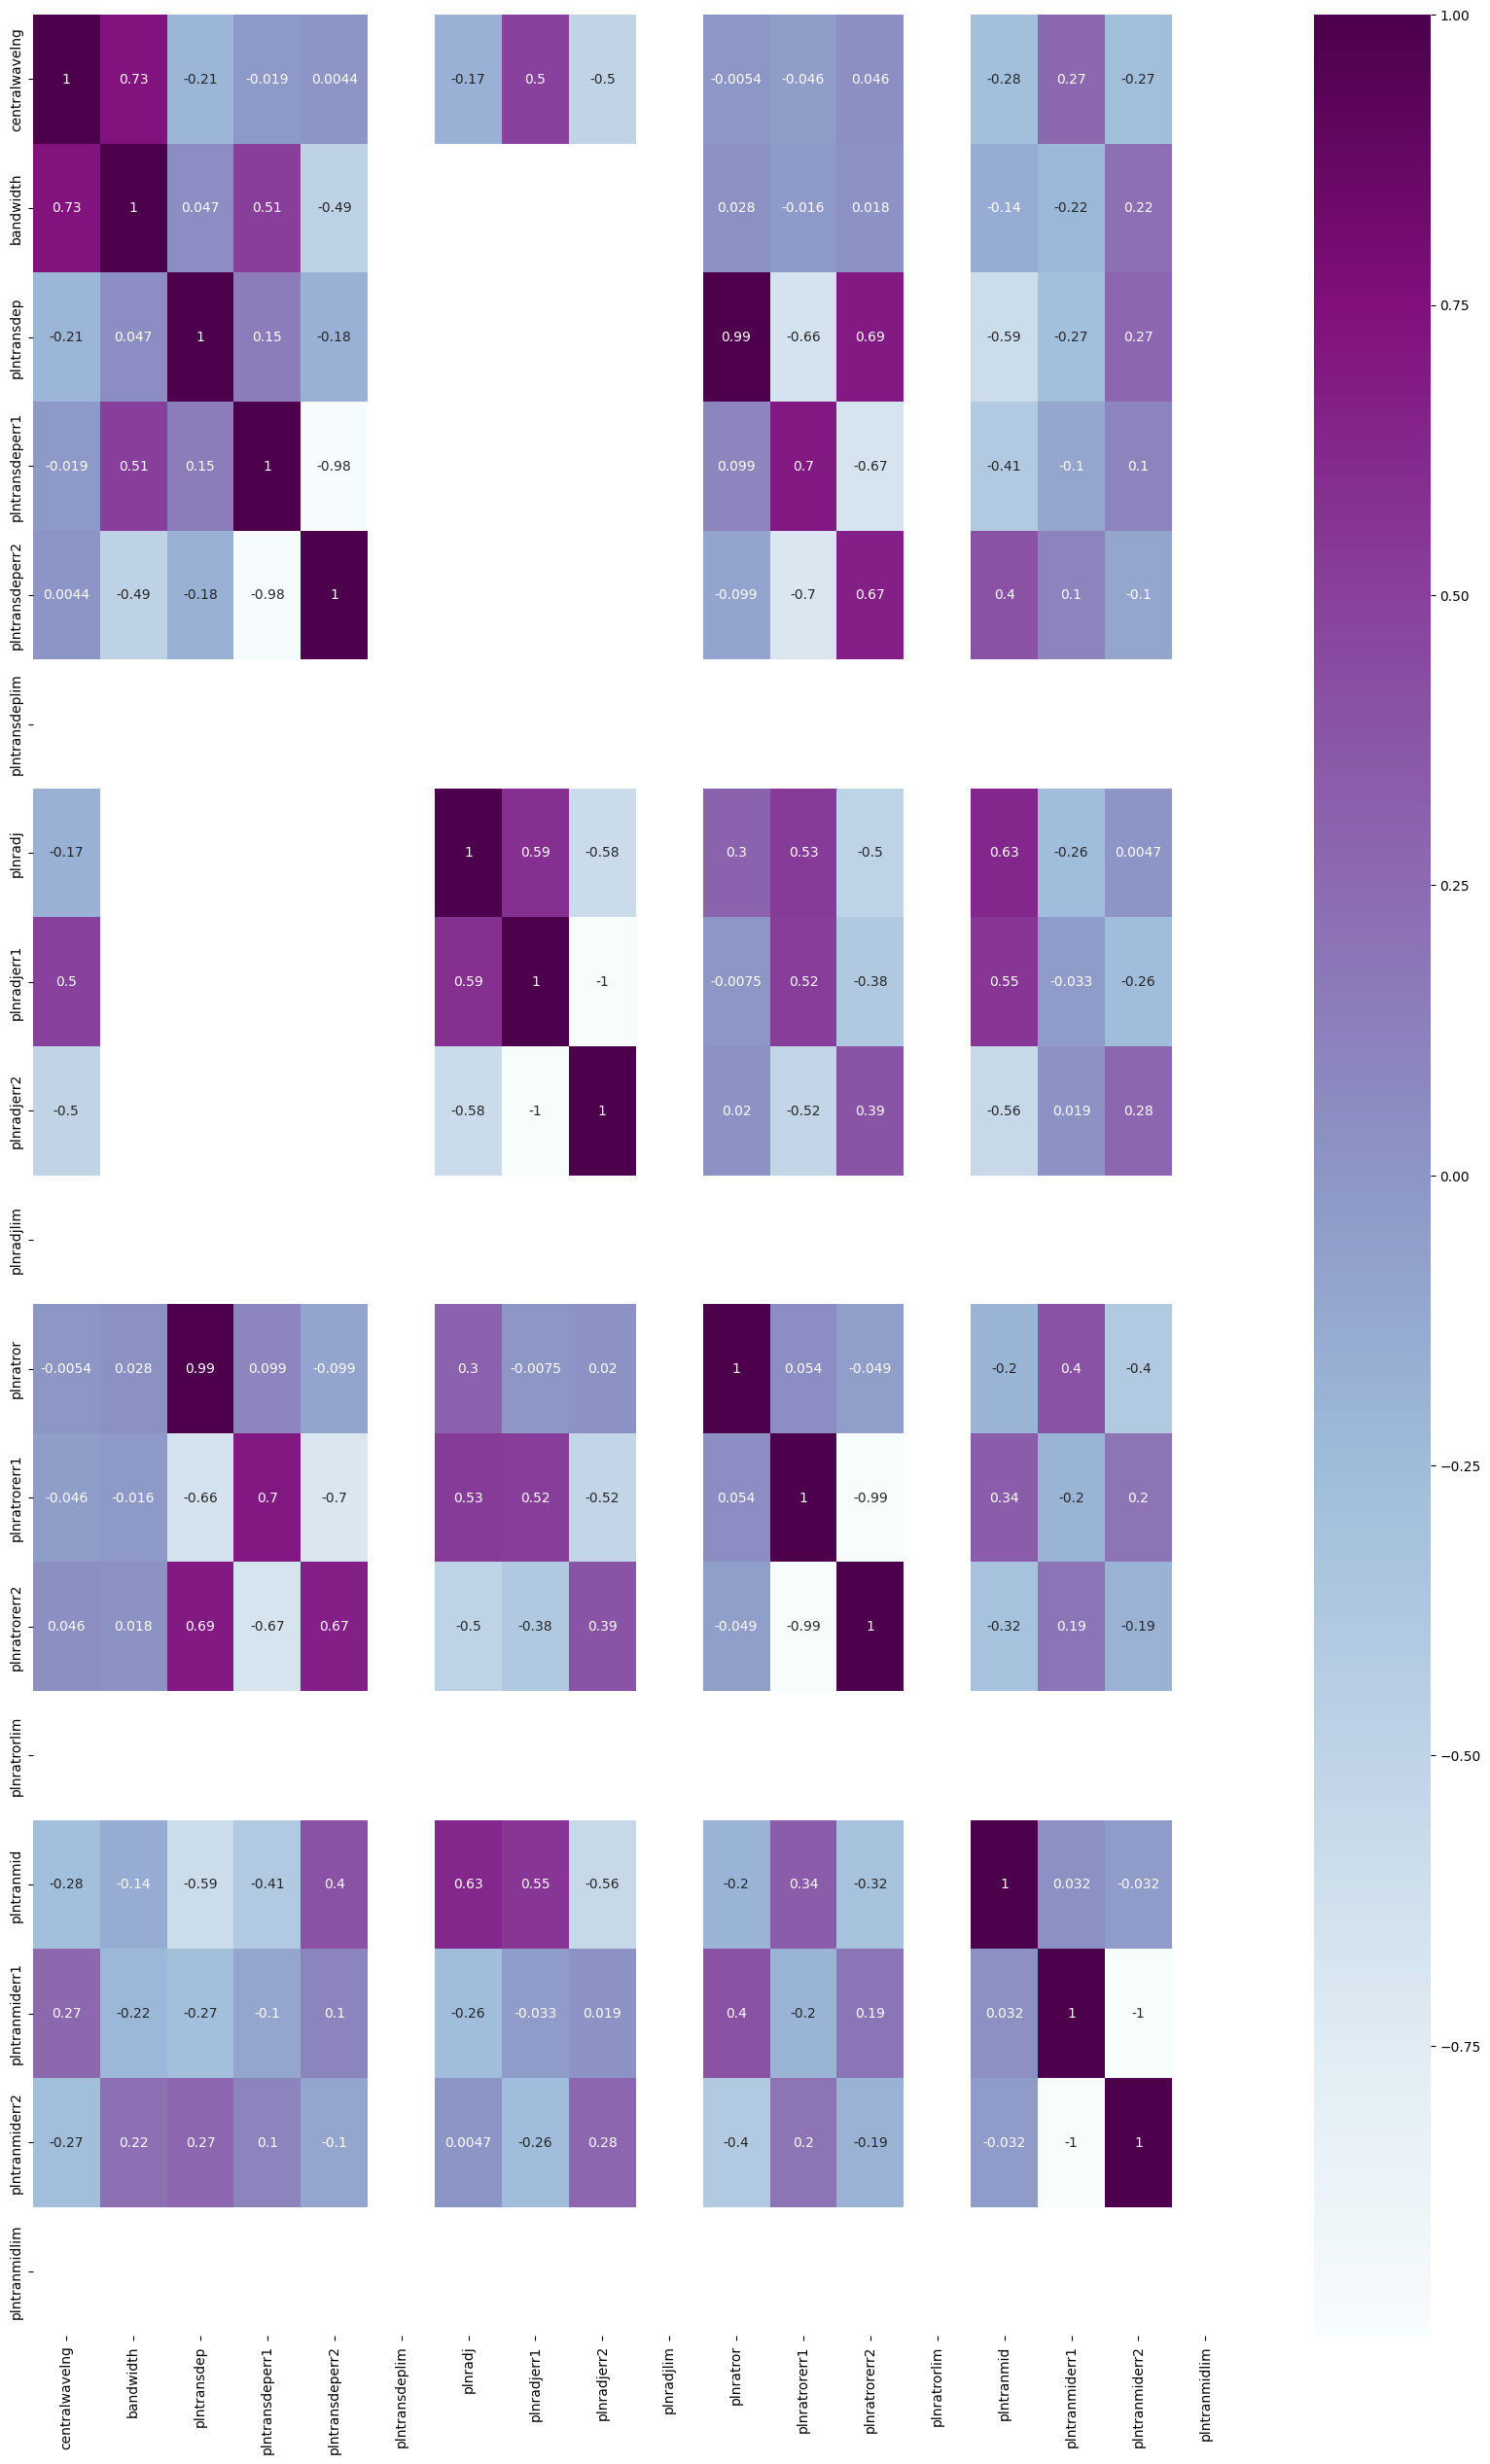

In [7]:
columnas_corr = ['centralwavelng', 'bandwidth', 'plntransdep', 'plntransdeperr1', 'plntransdeperr2', 'plntransdeplim',
                      'plnradj', 'plnradjerr1', 'plnradjerr2', 'plnradjlim', 'plnratror', 'plnratrorerr1',
                      'plnratrorerr2', 'plnratrorlim', 'plntranmid','plntranmiderr1', 'plntranmiderr2',
                      'plntranmidlim']

corr_matrix = trnsdf[columnas_corr].corr()

    
plt.figure(figsize=(20, 31))
sns.heatmap(corr_matrix,cmap="BuPu", annot=True)
plt.show()

**Variables de spectrometria**

- plntname: Nombre del planeta
- centralwavelng: Longitud de onda central [micrones]
- bandwidth: Ancho de banda [micrones]
- vespeclipdep: Profundidad del eclipse [porcentaje]
- espbritemp: Temperatura de brillo [K]
- plntreflink: Referencia
- facility: Instalación
- instrument: Instrumento

In [8]:
specdf = pd.DataFrame(spectdata)
specdf.head()

,plntname,centralwavelng,bandwidth,especlipdep,espbritemp,plntreflink,facility,instrument
0,WASP-80 b,3.6,NaN,0.4550,901.0,<a refstr=TRIAUD_ET_AL__2015 href=https://ui.a...,Spitzer Space Telescope satellite,Infrared Array Camera (IRAC)
1,WASP-80 b,4.5,NaN,0.9440,888.0,<a refstr=TRIAUD_ET_AL__2015 href=https://ui.a...,Spitzer Space Telescope satellite,Infrared Array Camera (IRAC)
2,HAT-P-13 b,3.6,NaN,0.0662,NaN,<a refstr=BUHLER_ET_AL__2016 href=https://ui.a...,Spitzer Space Telescope satellite,Infrared Array Camera (IRAC)
3,HAT-P-13 b,4.5,NaN,0.1426,NaN,<a refstr=BUHLER_ET_AL__2016 href=https://ui.a...,Spitzer Space Telescope satellite,Infrared Array Camera (IRAC)
4,XO-3 b,4.5,NaN,0.1580,NaN,<a refstr=WONG_ET_AL__2014 href=https://ui.ads...,Spitzer Space Telescope satellite,Infrared Array Camera (IRAC)


De manera general podemos observar que muchos de los datos en distintas columnas tienen datos daltantes, esto seguramente a la necesidad de segundas comprobaciones para cada dato.

# Limpieza de dataset

### Manejo de valores faltantes

Para este caso se hará limpieza de aquellas columnas con un porcentaje mayor a .5 con valores Null
y que no tengan relación alta con otras variables

Además se eliminarán aquellos planetas que tienen más de una observación, por lo tanto están duplicados

In [9]:
uniepdf = expdf.drop_duplicates(subset="pl_name", keep="last")
uniepdf.head()

,pl_name,sy_snum,sy_pnum,sy_mnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,...,st_teff,st_rad,st_mass,st_metratio,st_logg,st_age,st_dens,sy_refname,sy_dist,rowupdate
1,11 Com b,2,1,0,0,NaN,1.21,NaN,NaN,NaN,...,NaN,NaN,2.60,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,93.1846,23/07/2014
4,11 UMi b,1,1,0,0,516.22,1.54,NaN,NaN,0.080,...,4340.0,24.08,1.80,[Fe/H],1.60,1.56,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,125.3210,25/04/2018
6,14 And b,1,1,0,0,185.84,0.83,NaN,NaN,0.000,...,4813.0,11.00,2.20,[Fe/H],2.63,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,75.4392,14/05/2014
13,14 Her b,1,2,0,0,1796.40,2.80,NaN,NaN,0.338,...,5255.0,NaN,0.90,[Fe/H],4.40,3.90,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,17.9323,25/04/2018
19,16 Cyg B b,3,1,0,0,799.50,1.68,NaN,NaN,0.689,...,5747.0,1.13,1.03,[M/H],4.35,NaN,1.011,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,21.1397,25/04/2018


In [14]:
clean_expdf = uniepdf.dropna(thresh=len(uniepdf) * 0.5, axis=1)
clean_expdf.head()

,pl_name,sy_snum,sy_pnum,sy_mnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_orbeccen,pl_tranmid,ttv_flag,st_teff,st_rad,st_mass,st_metratio,st_logg,sy_refname,sy_dist,rowupdate
1,11 Com b,2,1,0,0,NaN,1.21,NaN,NaN,NaN,0,NaN,NaN,2.60,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,93.1846,23/07/2014
4,11 UMi b,1,1,0,0,516.22,1.54,NaN,0.080,NaN,0,4340.0,24.08,1.80,[Fe/H],1.60,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,125.3210,25/04/2018
6,14 And b,1,1,0,0,185.84,0.83,NaN,0.000,NaN,0,4813.0,11.00,2.20,[Fe/H],2.63,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,75.4392,14/05/2014
13,14 Her b,1,2,0,0,1796.40,2.80,NaN,0.338,NaN,0,5255.0,NaN,0.90,[Fe/H],4.40,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,17.9323,25/04/2018
19,16 Cyg B b,3,1,0,0,799.50,1.68,NaN,0.689,NaN,0,5747.0,1.13,1.03,[M/H],4.35,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,21.1397,25/04/2018


## Revisamos aquellos datos con mayor correlación en los Transitos

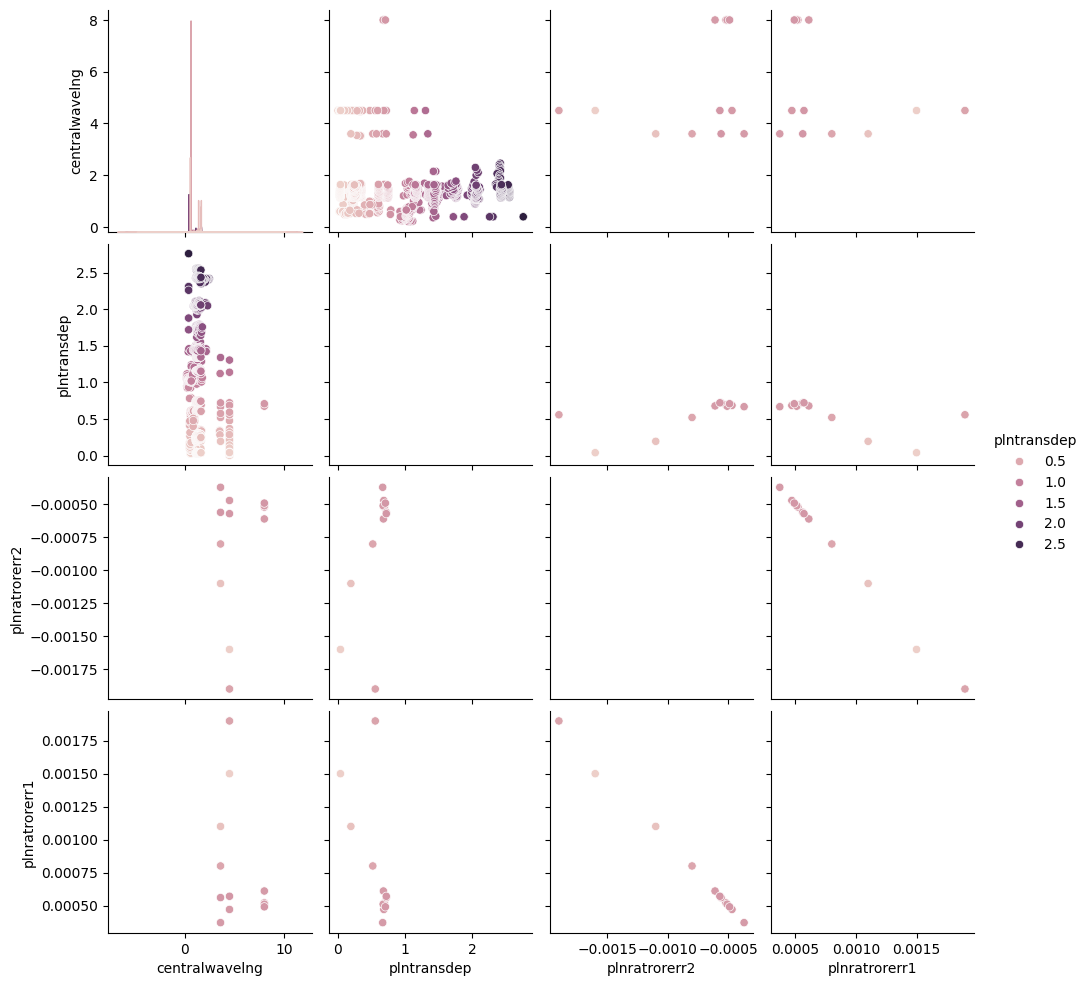

In [15]:
columnas_interes = ['centralwavelng', 'plntransdep',
                      'plnratrorerr2','plnratrorerr1']

sns.pairplot(trnsdf, hue='plntransdep', vars=columnas_interes)

In [16]:
print(expdf.describe())

            sy_snum       sy_pnum  sy_mnum  pl_controv_flag     pl_orbper  \
count  32576.000000  32576.000000  32576.0     32576.000000  2.977300e+04   
mean       1.075915      1.874969      0.0         0.001473  1.420757e+04   
std        0.291884      1.190829      0.0         0.038358  2.330649e+06   
min        1.000000      1.000000      0.0         0.000000  9.070629e-02   
25%        1.000000      1.000000      0.0         0.000000  4.662719e+00   
50%        1.000000      1.000000      0.0         0.000000  1.099573e+01   
75%        1.000000      2.000000      0.0         0.000000  2.757182e+01   
max        4.000000      8.000000      0.0         1.000000  4.020000e+08   

         pl_orbsmax       pl_rade      pl_masse   pl_orbeccen      pl_insol  \
count  18201.000000  22719.000000   2796.000000  16674.000000  13716.000000   
mean       2.441709      5.009905    583.288171      0.036184    334.854189   
std       75.648579     66.730936   1282.386777      0.111754   1409.

**Valores NaN**

# Selección de caracteristicas en exoplanetas

In [25]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

In [49]:
X1 = uniepdf[['sy_snum', 'sy_pnum', 'sy_mnum', 'pl_controv_flag', 'pl_orbper', 'pl_orbsmax',
           'pl_rade', 'pl_masse', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'pl_orbincl',
           'pl_tranmid', 'ttv_flag', 'pl_ratror', 'st_teff', 'st_rad',
           'st_mass', 'st_logg', 'st_age', 'st_dens', 'sy_dist']]
y = uniepdf['pl_masse']

**Manejo valores NaN** 
Temporal

In [50]:
data_filled = uniepdf.fillna(0)

# Volver a definir X e y
X1 = data_filled[['sy_snum', 'sy_pnum', 'sy_mnum', 'pl_controv_flag', 'pl_orbper', 'pl_orbsmax',
                  'pl_rade', 'pl_masse', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'pl_orbincl',
                  'pl_tranmid', 'ttv_flag', 'pl_ratror', 'st_teff', 'st_rad',
                  'st_mass', 'st_logg', 'st_age', 'st_dens', 'sy_dist']]
y = data_filled['st_dens']

In [51]:
selector = SelectKBest(score_func=f_regression, k='all')  # Puedes ajustar 'k' a un número específico
X_new = selector.fit_transform(X1, y)

# Obtener las puntuaciones y las características
scores = selector.scores_
features = X1.columns

feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

            Feature         Score
6           pl_rade  2.333695e+03
14        pl_ratror  2.242732e+03
15          st_teff  1.140718e+02
11       pl_orbincl  5.901435e+01
18          st_logg  5.154026e+01
12       pl_tranmid  1.505308e+01
19           st_age  1.468947e+01
10           pl_eqt  1.170920e+01
8       pl_orbeccen  1.123061e+01
3   pl_controv_flag  1.116318e+01
17          st_mass  6.144872e+00
16           st_rad  5.551941e+00
21          sy_dist  2.564423e+00
7          pl_masse  1.781957e+00
13         ttv_flag  9.473466e-01
1           sy_pnum  8.626185e-01
5        pl_orbsmax  2.566889e-01
0           sy_snum  4.968726e-02
4         pl_orbper  3.553991e-02
9          pl_insol  2.149189e-08
2           sy_mnum  0.000000e+00
20          st_dens -5.688046e+18


### Resulta importante la obtención de la masa de un planeta
Con esto se podría obtener aquellas variables representativas
ya que tenemos planetas que no cuentan con una masa en la base de datos.

# Selección de caracteristicas en transitos

In [52]:
X = trnsdf[['centralwavelng', 'bandwidth', 'plntransdep', 'plntransdeperr1', 'plntransdeperr2', 'plntransdeplim',
                      'plnradj', 'plnradjerr1', 'plnradjerr2', 'plnradjlim', 'plnratror', 'plnratrorerr1',
                      'plnratrorerr2', 'plnratrorlim', 'plntranmid','plntranmiderr1', 'plntranmiderr2',
                      'plntranmidlim']]
y = trnsdf['plntransdep']

In [53]:
data_filled = trnsdf.fillna(0)

# Volver a definir X e y
X = data_filled[['centralwavelng', 'bandwidth', 'plntransdep', 'plntransdeperr1', 'plntransdeperr2', 'plntransdeplim',
                      'plnradj', 'plnradjerr1', 'plnradjerr2', 'plnradjlim', 'plnratror', 'plnratrorerr1',
                      'plnratrorerr2', 'plnratrorlim', 'plntranmid','plntranmiderr1', 'plntranmiderr2',
                      'plntranmidlim']]
y = data_filled['plntransdep']

In [54]:
selectortrns = SelectKBest(score_func=f_regression, k='all')  # Puedes ajustar 'k' a un número específico
X_new = selectortrns.fit_transform(X, y)

# Obtener las puntuaciones y las características
scores = selectortrns.scores_
features = X.columns

feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

            Feature         Score
10        plnratror  1.474712e+03
3   plntransdeperr1  5.701048e+02
4   plntransdeperr2  5.585601e+02
0    centralwavelng  4.394862e+01
11    plnratrorerr1  2.263786e+01
12    plnratrorerr2  2.213429e+01
14       plntranmid  1.845183e+01
6           plnradj  3.542246e+00
15   plntranmiderr1  2.564327e+00
16   plntranmiderr2  2.563347e+00
8       plnradjerr2  2.172463e+00
7       plnradjerr1  2.166323e+00
1         bandwidth  6.170481e-01
5    plntransdeplim  0.000000e+00
13     plnratrorlim  0.000000e+00
9        plnradjlim  0.000000e+00
17    plntranmidlim  0.000000e+00
2       plntransdep -1.456464e+18


In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Aplicar RFE para seleccionar las características
selector = RFE(model, n_features_to_select=5)  
selector.fit(X, y)


X_selected = selector.transform(X)
selected_features = X.columns[selector.support_]


print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['plntransdep', 'plnradjerr1', 'plnradjerr2', 'plntranmiderr1',
       'plntranmiderr2'],
      dtype='object')


**En este ultimo caso se muestran aquellas caracteristicas mas relevantes para la prediccion,
en la aplicacion para predecir la profundidad de un transito aún es necesario
validar estos resultados.**

# Aplicando reducción de dimensionalidad a exoplanetas

In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [77]:
print(X1.isnull().sum())

X1.fillna(0, inplace=True)

sy_snum            0
sy_pnum            0
sy_mnum            0
pl_controv_flag    0
pl_orbper          0
pl_orbsmax         0
pl_rade            0
pl_masse           0
pl_orbeccen        0
pl_insol           0
pl_eqt             0
pl_orbincl         0
pl_tranmid         0
ttv_flag           0
pl_ratror          0
st_teff            0
st_rad             0
st_mass            0
st_logg            0
st_age             0
st_dens            0
sy_dist            0
dtype: int64


In [78]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [79]:
pca = PCA(n_components=2)  # Reducir a 2 dimensiones
X_reduced = pca.fit_transform(X_normalized)

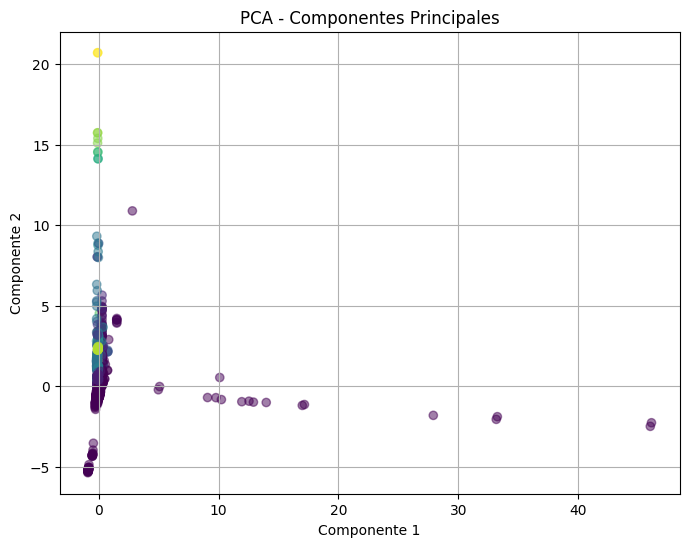

In [80]:
pca_df = pd.DataFrame(data=X_reduced, columns=['Componente 1', 'Componente 2'])

# Visualizar las dos primeras componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Componente 1'], pca_df['Componente 2'], alpha=0.5, c=y)
plt.title('PCA - Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

In [64]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [72]:
print(X1.isnull().sum())

# Si hay valores nulos, decide cómo manejarlos (rellenar o eliminar)
X1.fillna(0, inplace=True)

sy_snum            0
sy_pnum            0
sy_mnum            0
pl_controv_flag    0
pl_orbper          0
pl_orbsmax         0
pl_rade            0
pl_masse           0
pl_orbeccen        0
pl_insol           0
pl_eqt             0
pl_orbincl         0
pl_tranmid         0
ttv_flag           0
pl_ratror          0
st_teff            0
st_rad             0
st_mass            0
st_logg            0
st_age             0
st_dens            0
sy_dist            0
dtype: int64


In [73]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [74]:
tsne = TSNE(n_components=2, random_state=42)  # n_components=2 para reducir a 2 dimensiones
X_tsne = tsne.fit_transform(X_normalized)

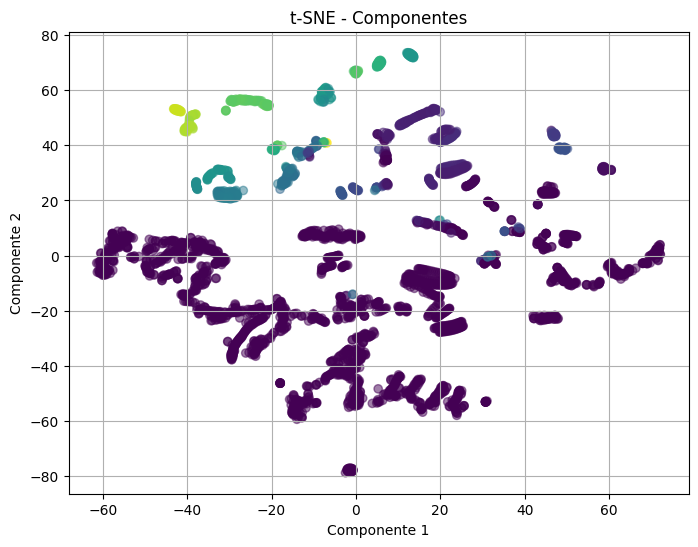

In [75]:
tsne_df = pd.DataFrame(data=X_tsne, columns=['Componente 1', 'Componente 2'])

# Visualizar las dos primeras componentes t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Componente 1'], tsne_df['Componente 2'], alpha=0.5, c=y)
plt.title('t-SNE - Componentes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

**Los puntos cercanos unos de otros sugieren agrupamiento en altas dimensiones.**

**Se muestran patrones más complejos que utilizando PCA**

# Aplicando reducción de dimensionalidad a transitos

In [93]:
print(X.isnull().sum())

X.fillna(0, inplace=True)

centralwavelng     0
bandwidth          0
plntransdep        0
plntransdeperr1    0
plntransdeperr2    0
plntransdeplim     0
plnradj            0
plnradjerr1        0
plnradjerr2        0
plnradjlim         0
plnratror          0
plnratrorerr1      0
plnratrorerr2      0
plnratrorlim       0
plntranmid         0
plntranmiderr1     0
plntranmiderr2     0
plntranmidlim      0
dtype: int64


/tmp/ipykernel_13819/4122813399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [94]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [95]:
pca = PCA(n_components=3)  # Reducir a 3 dimensiones
X_pca = pca.fit_transform(X_normalized)

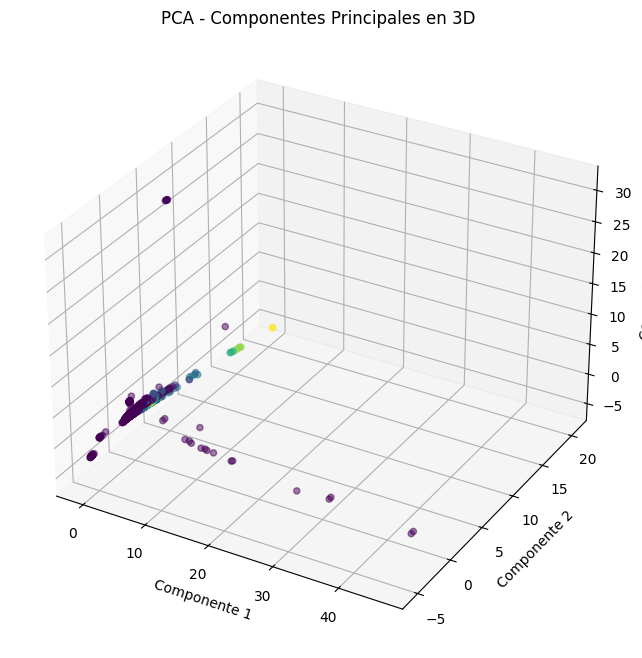

In [97]:
pca_df = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2', 'Componente 3'])

# Visualizar las tres primeras componentes principales en un gráfico 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['Componente 1'], pca_df['Componente 2'], pca_df['Componente 3'], alpha=0.5, c=y)
ax.set_title('PCA - Componentes Principales en 3D')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.show()

In [85]:
print(X.isnull().sum())


X.fillna(0, inplace=True)

centralwavelng     0
bandwidth          0
plntransdep        0
plntransdeperr1    0
plntransdeperr2    0
plntransdeplim     0
plnradj            0
plnradjerr1        0
plnradjerr2        0
plnradjlim         0
plnratror          0
plnratrorerr1      0
plnratrorerr2      0
plnratrorlim       0
plntranmid         0
plntranmiderr1     0
plntranmiderr2     0
plntranmidlim      0
dtype: int64


/tmp/ipykernel_13819/3137281598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [86]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [87]:
tsne = TSNE(n_components=2, random_state=42)  # n_components=2 para reducir a 2 dimensiones
X_tsne = tsne.fit_transform(X_normalized)

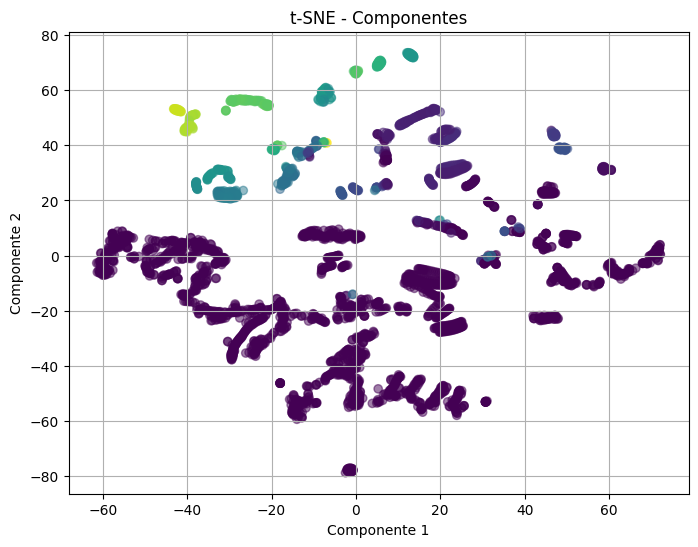

In [88]:
tsne_df = pd.DataFrame(data=X_tsne, columns=['Componente 1', 'Componente 2'])

# Visualizar las dos primeras componentes t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Componente 1'], tsne_df['Componente 2'], alpha=0.5, c=y)
plt.title('t-SNE - Componentes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

**Se determinan el número óptimo de clústeres a utilizar en el algoritmo de K-Means**

In [99]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [106]:
inertia = []
K = range(1, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)



In [103]:
n_clusters = 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_normalized)


labels = kmeans.labels_

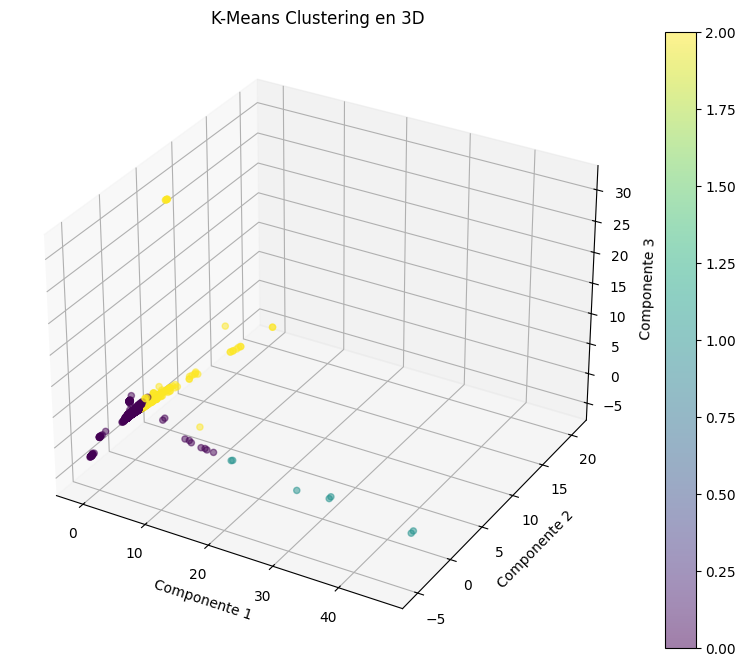

In [104]:
pca_df = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2', 'Componente 3'])
pca_df['Cluster'] = labels


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['Componente 1'], pca_df['Componente 2'], pca_df['Componente 3'], 
                     c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
ax.set_title('K-Means Clustering en 3D')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.colorbar(scatter)
plt.show()

**Los puntos aislados que se encuentran lejos de los grupos principales pueden ser valores atípicos que se podrían evaluar en más detalle, pero esta primera comprobación resulta interesante.**
